In [32]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Modify dataset to include test scores
%run -i calc_score.py

### Dataset

In [150]:
#data_file = pd.read_csv("new_data.csv", index_col=0,skiprows=(2,1), usecols=(0,1,2,3,4,5,33))
data_file = pd.read_csv("new_data.csv",skiprows=(2,1), usecols=(0,1,2,3,4,5,33))
data = pd.DataFrame(data_file)
data.sort_values(by=['Test Score'])

,Participant Code,Term,Test,Instructor,LetterGrade,PercentGrade,Test Score
73,3,1,Post,B,F,28.76,0.00
145,79,2,Pre,B,B+,86.68,0.00
75,81,1,Post,B,A,93.88,0.00
81,19,1,Pre,B,A,96.09,0.00
85,44,1,Pre,B,C-,71.46,0.00
...,...,...,...,...,...,...,...
77,64,1,Pre,B,A,101.30,51.85
92,35,1,Pre,B,A,103.24,51.85
44,72,1,Post,A,B-,73.66,51.85
13,84,1,Post,A,A,94.17,55.56


## Analysis
### Relationship between scores on the test and the final course grade (percentage)
From the two scatter plots below, we can see that there was no direct relation between test scores and final percentage grades for the class as a whole. What we can verify is that there was an overall improvement in both test scores and percentage grades between the group of Pre test takers, and the group of Post test takers.

#### Relation between Pre Test Scores and Final Percent Grade

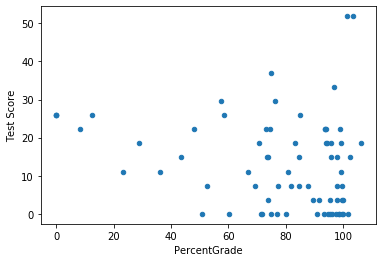

In [151]:
data_pre = pd.DataFrame(data[(data['Test']=="Pre")])
data_pre.drop_duplicates(subset ="Participant Code", keep = False, inplace = True) 
scatter_plot = data_pre.plot.scatter(x='PercentGrade', y='Test Score')

#### Relation between Post Test Scores and Final Percent Grade

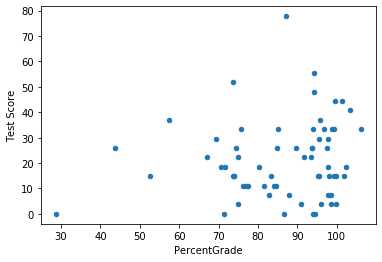

In [152]:
data_post = pd.DataFrame(data[(data['Test']=="Post")])
data_post.drop_duplicates(subset ="Participant Code", keep = False, inplace = True) 
scatter_plot = data_post.plot.scatter(x='PercentGrade', y='Test Score')

## Analysis
### Relationship between Pre and Post test scores

In [167]:
codes_pre = data_pre['Participant Code'].to_numpy()
codes_post = data_post['Participant Code'].to_numpy()
codes_pre_ind = pd.Index(codes_pre)
codes_post_ind = pd.Index(codes_post)
codes = codes_pre_ind.intersection(codes_post_ind) #only student codes who took both tests

pre_sc = data_pre[data_pre['Participant Code'].isin(codes)]
post_sc = data_post[data_post['Participant Code'].isin(codes)]
index=codes

df = pd.DataFrame({'Pre Test': pre_sc['Test Score'],
                   'Post Test': post_sc['Test Score']}, index=index)
#ax = df.plot()